- [Preprocessing](#Preprocessing)
- [LR](#LR)
  - [Other features](#Other-features)
  - [Other + sentiment features](#Other-+-sentiment-features)
  - [Only sentiment feature](#Only-sentiment-feature)

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Preprocessing

In [3]:
df = pd.read_excel('feature_new.xlsx')
df1 = df.dropna(axis=0)
print(df1.shape)
df1.head()

(11605, 13)


,Unnamed: 0,time,asset,MFI,SMA5,SMA10,MOM,ROC,ATR,BETA,CCI,SENTI,Label
0,0,2016-01-04,600000.XSHG,26.206273,11.976,12.050,-0.14,-1.183432,0.352271,0.524071,-99.737533,30.666667,0
1,1,2016-01-04,600004.XSHG,47.764056,9.138,9.249,-0.02,-0.217865,0.211334,0.244056,39.855072,0.000000,0
2,2,2016-01-04,600008.XSHG,18.628693,4.854,4.908,-0.15,-3.054990,0.118358,0.205416,-77.651515,75.000000,0
3,3,2016-01-04,600015.XSHG,83.146985,8.978,8.976,0.65,7.611241,0.338147,0.161472,93.137255,6.380300,0
4,4,2016-01-04,600028.XSHG,24.242781,3.958,3.985,-0.05,-1.250000,0.061401,0.473047,-17.156863,7.392900,0


In [4]:
## other features
X1, y1 = df1.iloc[:, 3:-2], df1.iloc[:, -1]

X1_train, X1_test, y1_train, y1_test =\
    train_test_split(X1, y1, 
                     test_size=0.3, 
                     random_state=1, 
                     stratify=y1)
X1_train.head()

,MFI,SMA5,SMA10,MOM,ROC,ATR,BETA,CCI
8063,60.216461,3.818,3.814,-0.22,-5.527638,0.174302,1.926743,-13.888889
4039,14.023137,4.336,4.494,-0.67,-14.346895,0.290551,0.796233,-93.607306
2292,58.629655,16.854,18.045,-5.34,-23.775601,1.503857,1.323628,22.747547
8365,0.000000,18.120,18.120,0.00,0.000000,0.000000,0.000000,0.000000
1337,49.639587,6.188,6.591,-1.32,-18.106996,0.536353,0.708719,-37.587413


In [5]:
## other + sentiment features
X2, y2 = df1.iloc[:, 3:-1], df1.iloc[:, -1]

X2_train, X2_test, y2_train, y2_test =\
    train_test_split(X2, y2, 
                     test_size=0.3, 
                     random_state=1, 
                     stratify=y2)
X2_train.head()

,MFI,SMA5,SMA10,MOM,ROC,ATR,BETA,CCI,SENTI
8063,60.216461,3.818,3.814,-0.22,-5.527638,0.174302,1.926743,-13.888889,9.957400
4039,14.023137,4.336,4.494,-0.67,-14.346895,0.290551,0.796233,-93.607306,-89.000000
2292,58.629655,16.854,18.045,-5.34,-23.775601,1.503857,1.323628,22.747547,48.000000
8365,0.000000,18.120,18.120,0.00,0.000000,0.000000,0.000000,0.000000,57.863629
1337,49.639587,6.188,6.591,-1.32,-18.106996,0.536353,0.708719,-37.587413,25.792200


In [6]:
## only sentiment feature
X3, y3 = df1.iloc[:, 11], df1.iloc[:, -1]

X3_train, X3_test, y3_train, y3_test =\
    train_test_split(X3, y3, 
                     test_size=0.3, 
                     random_state=1, 
                     stratify=y3)
X3_train, X3_test, y3_train, y3_test = np.array(X3_train),np.array(X3_test),np.array(y3_train),np.array(y3_test)
X3_train = X3_train.reshape(-1,1)
X3_test = X3_test.reshape(-1,1)
y3_train = y3_train.reshape(-1,1)
y3_test = y3_test.reshape(-1,1)

# LR

### Other features

In [7]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',random_state=1))

In [8]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'logisticregression__C': param_range}]

gs1 = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs1 = gs1.fit(X1_train, y1_train)
print(gs1.best_score_)
print(gs1.best_params_)

0.5374861504370306
{'logisticregression__C': 1.0}


D:\Python-A\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(C=1,penalty='l2',random_state=1))

In [10]:
pipe_lr.fit(X1_train, y1_train)
y1_pred = pipe_lr.predict(X1_test)
confmat = confusion_matrix(y_true=y1_test, y_pred=y1_pred)

D:\Python-A\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


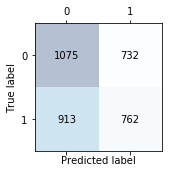

In [11]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

### Other features + senti feature

In [12]:
gs2 = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs2 = gs2.fit(X2_train, y2_train)
print(gs2.best_score_)
print(gs2.best_params_)

0.5447494767942879
{'logisticregression__C': 0.001}


D:\Python-A\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(C=0.001,penalty='l2',random_state=1))

In [14]:
pipe_lr.fit(X2_train, y2_train)
y2_pred = pipe_lr.predict(X2_test)
confmat = confusion_matrix(y_true=y2_test, y_pred=y2_pred)

D:\Python-A\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


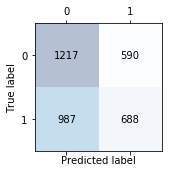

In [15]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

### Only sentiment feature

In [16]:
gs3 = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs3 = gs3.fit(X3_train, y3_train)
print(gs3.best_score_)
print(gs3.best_params_)

0.5180352086667488
{'logisticregression__C': 0.01}


D:\Python-A\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python-A\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(C=0.01,penalty='l2',random_state=1))

In [18]:
pipe_lr.fit(X3_train, y3_train)
y3_pred = pipe_lr.predict(X3_test)
confmat = confusion_matrix(y_true=y3_test, y_pred=y3_pred)

D:\Python-A\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python-A\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


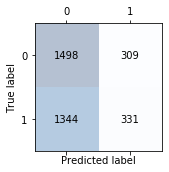

In [19]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()